<a href="https://colab.research.google.com/github/abhijadhav14/Planet-Hunt---Asteroid-Classification-Challenge/blob/main/Planet_Hunt_Asteroid_Classification_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install seaborn scikit-learn

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import iqr, skew

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/transformed_data (1).csv')

<ipython-input-4-131f6064f2ee>:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Dataset/transformed_data (1).csv')


In [5]:
df.head()

,index,id,spkid,full_name,pdes,name,prefix,neo,pha,H,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,323650,a0323651,2323651,323651 (2005 BR20),323651,0,0,N,N,18.2,...,0.000005,0.000134,0.000138,0.000034,1.785700e-08,2.987900e-09,0.000114,0.000013,MBA,0.73452
1,571724,bK04C47Q,3242421,(2004 CQ47),2004 CQ47,0,0,N,N,17.7,...,0.000006,0.000062,0.000075,0.000047,5.644400e-08,6.310600e-09,0.000198,0.000040,MBA,0.59010
2,395983,a0395984,2395984,395984 (2013 BV32),395984,0,0,N,N,17.4,...,0.000009,0.000113,0.000119,0.000041,5.827700e-08,6.375200e-09,0.000191,0.000047,MBA,0.47752
3,235862,a0235863,2235863,235863 (2005 AY53),235863,0,0,N,N,15.1,...,0.000006,0.000034,0.000041,0.000029,5.184000e-08,3.813600e-09,0.000174,0.000043,MBA,0.56332
4,651830,bK09B35Q,3445579,(2009 BQ35),2009 BQ35,0,0,N,N,17.3,...,0.000009,0.000081,0.000114,0.000069,5.354400e-08,5.324700e-09,0.000334,0.000041,MBA,0.61287


In [6]:
print("Data Types:\n", df.dtypes)
print("\nBasic Statistics:\n", df.describe())

Data Types:
 index               int64
id                 object
spkid               int64
full_name          object
pdes               object
name               object
prefix             object
neo                object
pha                object
H                 float64
diameter          float64
albedo            float64
diameter_sigma    float64
orbit_id           object
epoch             float64
epoch_mjd           int64
epoch_cal           int64
equinox            object
e                 float64
a                 float64
q                 float64
i                 float64
om                float64
w                 float64
ma                float64
ad                float64
n                 float64
tp                float64
tp_cal            float64
per               float64
per_y             float64
moid              float64
moid_ld           float64
sigma_e           float64
sigma_a           float64
sigma_q           float64
sigma_i           float64
sigma_om          float64

In [7]:
features = ['H', 'diameter', 'albedo']
for col in features:
    print(f"\nFeature: {col}")
    print(f"Range: {df[col].max() - df[col].min():.4f}")
    print(f"Mean: {df[col].mean():.4f}")
    print(f"Median: {df[col].median():.4f}")
    print(f"Std Dev: {df[col].std():.4f}")


Feature: H
Range: 32.3000
Mean: 16.7870
Median: 16.9000
Std Dev: 2.2626

Feature: diameter
Range: 231.6890
Mean: 0.7756
Median: 0.0000
Std Dev: 3.5416

Feature: albedo
Range: 1.0000
Mean: 0.0185
Median: 0.0000
Std Dev: 0.0615


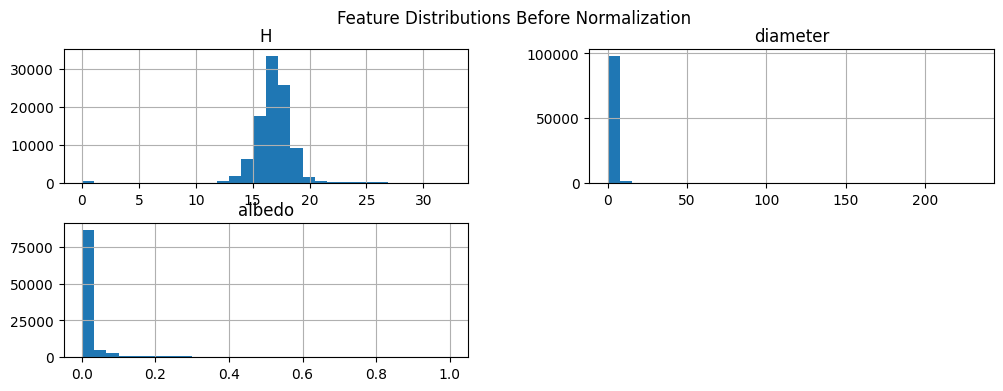

In [8]:
df[features].hist(bins=30, figsize=(12, 4))
plt.suptitle("Feature Distributions Before Normalization")
plt.show()

In [9]:
if 'year' in df.columns and 'detection_method' in df.columns:
    pivot_table = df.pivot_table(index='year', columns='detection_method', aggfunc='size', fill_value=0)
    sns.heatmap(pivot_table, cmap="coolwarm", annot=True, fmt="d")
    plt.title("Detection Methods Over Years")
    plt.show()

In [10]:
print("\n--- Detection Type Counts ---")
print("NEOs (NEO flag = 1):", df[df['neo'] == 1].shape[0])
print("PHAs (PHA flag = 1):", df[df['pha'] == 1].shape[0])
print("Main-belt (Non-NEO):", df[df['neo'] == 0].shape[0] - df[df['pha'] == 1].shape[0])


--- Detection Type Counts ---
NEOs (NEO flag = 1): 0
PHAs (PHA flag = 1): 0
Main-belt (Non-NEO): 0


In [11]:
for col in features:
    print(f"\nIQR of {col}: {iqr(df[col])}")
    print(f"Skewness of {col}: {skew(df[col])}")


IQR of H: 1.6999999999999993
Skewness of H: -2.443627630328289

IQR of diameter: 0.0
Skewness of diameter: 22.370272805179248

IQR of albedo: 0.0
Skewness of albedo: 4.710918189499467


In [12]:
print("\nClass Distribution:\n", df['neo'].value_counts())


Class Distribution:
 neo
N    97615
Y     2384
0        1
Name: count, dtype: int64


In [13]:
df['moid_to_sma_ratio'] = df['moid_ld'] / df['a']
print(df[['moid_ld', 'a', 'moid_to_sma_ratio']].head())

      moid_ld         a  moid_to_sma_ratio
0  376.725900  2.268877         166.040661
1  377.926100  2.572391         146.916275
2  550.500424  2.714802         202.777368
3  615.733099  3.113143         197.785063
4  496.845556  2.753819         180.420543


In [14]:
df['class'] = np.where(df['pha'] == 1, 2, np.where(df['neo'] == 1, 1, 0))

In [15]:
X = df[['H', 'diameter', 'albedo', 'moid_ld', 'a', 'moid_to_sma_ratio']]
y = df['class']

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [18]:
clf = RandomForestClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     25000

    accuracy                           1.00     25000
   macro avg       1.00      1.00      1.00     25000
weighted avg       1.00      1.00      1.00     25000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


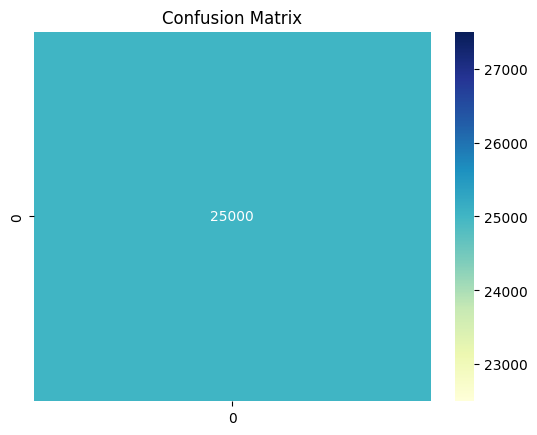

In [19]:
y_pred = clf.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.show()